<a href="https://colab.research.google.com/github/negarmajma/Machine-learning-sample-code/blob/main/Impo_ClassificationTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("drive/MyDrive/Datasets/Movie_classification.csv", header=0)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800,1
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

Missing Values

In [ ]:
df['Time_taken'].mean()

157.39149797570855

In [ ]:
df['Time_taken'].fillna(value=df['Time_taken'].mean(), inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

**Dummy** variable creation

In [ ]:
df=pd.get_dummies(df,columns=['3D_available','Genre'],drop_first=True)

In [ ]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,...,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,Start_Tech_Oscar,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,...,109.60,223.840,23,494,48000,1,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,...,146.64,243.456,42,462,43200,0,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,...,147.88,2022.400,38,458,69400,1,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,...,185.36,225.344,45,472,66800,1,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,...,176.48,225.792,55,395,72400,1,0,0,1,0


X-Y Split

In [ ]:
x=df.loc[:,df.columns!='Start_Tech_Oscar']
y=df['Start_Tech_Oscar']
type(x)

pandas.core.frame.DataFrame

In [ ]:
print(x.shape,y.shape)

(506, 20) (506,)


In [ ]:
x.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


      Test-Train split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape,y_train.shape, x_test.shape, y_test.shape)

(404, 20) (404,) (102, 20) (102,)


     Training Classification Tree

In [ ]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=3)

In [ ]:
clftree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

       Predict values trainined model


In [ ]:
y_train_pred=clftree.predict(x_train)
y_test_pred=clftree.predict(x_test)

In [ ]:
y_test_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0])

       Model Performance

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[172,  14],
       [126,  92]])

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[39,  5],
       [41, 17]])

In [ ]:
accuracy_score(y_test,y_test_pred)

0.5490196078431373

     Plotting desicion Tree

In [ ]:
dot_data=tree.export_graphviz(clftree,out_file=None, feature_names=x_train.columns,filled=True)

In [ ]:
from IPython.display import Image
import pydotplus

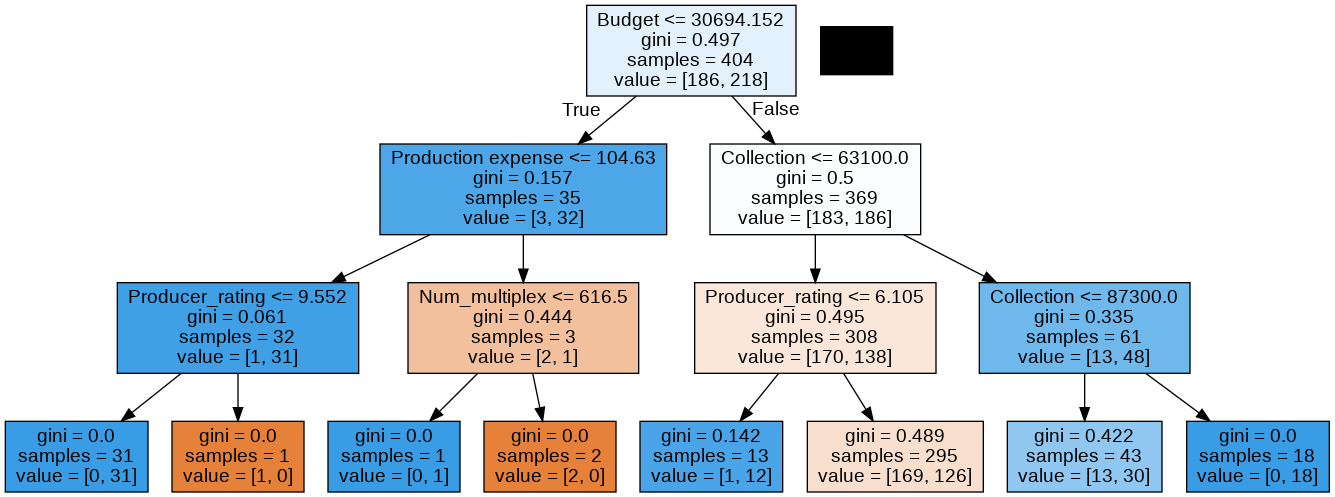

In [ ]:
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Controlling Tree growth

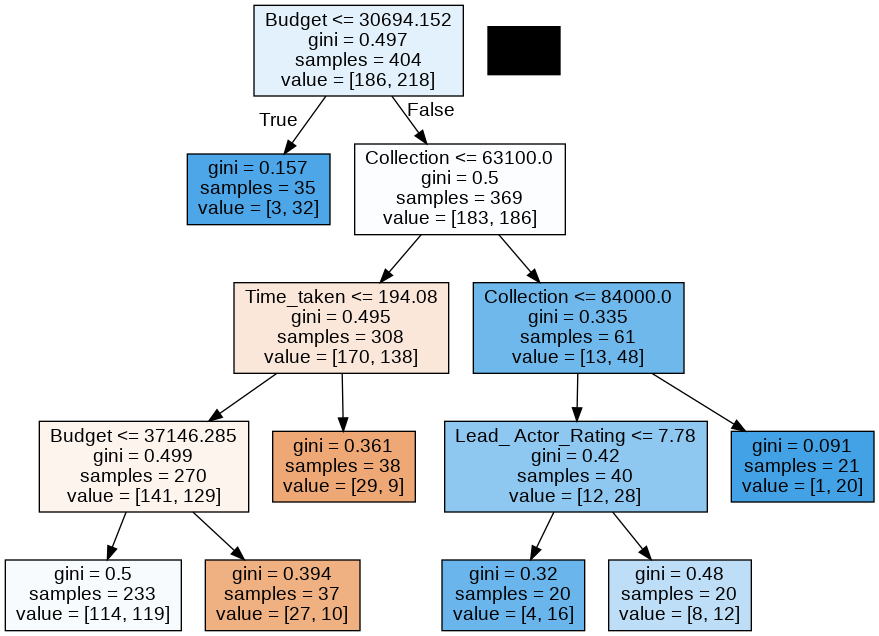

In [ ]:
clftree2=tree.DecisionTreeClassifier(min_samples_leaf=20, max_depth=4)
clftree2.fit(x_train,y_train)

dot_data=tree.export_graphviz(clftree2,out_file=None, feature_names=x_train.columns,filled=True)
graph2=pydotplus.graph_from_dot_data(dot_data)
Image(graph2.create_png())

In [ ]:
accuracy_score(y_test,clftree2.predict(x_test))

0.5588235294117647

### **                  Bagging**

In [ ]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
Bag_clf=BaggingClassifier(base_estimator=clftree,n_estimators=1000, 
                          bootstrap=True, n_jobs=-1,
                          random_state=42)

In [ ]:
Bag_clf.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,Bag_clf.predict(x_test))

array([[27, 17],
       [22, 36]])

In [ ]:
accuracy_score(y_test,Bag_clf.predict(x_test))

0.6176470588235294

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
confusion_matrix(y_test,rf_clf.predict(x_test))

array([[25, 19],
       [18, 40]])

In [ ]:
accuracy_score(y_test,rf_clf.predict(x_test))

0.6372549019607843

#**Grid Search**



In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
rf_clf=RandomForestClassifier(n_estimators=250, random_state=42)

In [ ]:
params_grid={'max_features': [4,5,6,7,8,9,10],
              'min_samples_split': [2,3,10]}

In [ ]:
grid_search=GridSearchCV(rf_clf,params_grid, n_jobs=-1,cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=250,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 10]},
             scoring='accuracy')

In [ ]:
grid_search.best_params_

{'max_features': 6, 'min_samples_split': 3}

In [ ]:
cvrf_clf=grid_search.best_estimator_

In [ ]:
accuracy_score(y_test,cvrf_clf.predict(x_test))

0.6274509803921569

In [ ]:
confusion_matrix(y_test,cvrf_clf.predict(x_test))

array([[25, 19],
       [19, 39]])

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
gbc_clf=GradientBoostingClassifier()
gbc_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
accuracy_score(y_test,gbc_clf.predict(x_test))

0.5784313725490197

In [ ]:
gbc_clf2=GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_clf2.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [ ]:
accuracy_score(y_train,gbc_clf2.predict(x_train))

0.7623762376237624

In [ ]:
accuracy_score(y_test,gbc_clf2.predict(x_test))

0.6176470588235294

**Ada Boost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada_clf=AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
ada_clf.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [ ]:
accuracy_score(y_train,ada_clf.predict(x_train))

In [ ]:
accuracy_score(y_test,ada_clf.predict(x_test))

0.6274509803921569

In [ ]:
ada_clf2=AdaBoostClassifier(rf_clf,learning_rate=0.02, n_estimators=500)

In [ ]:
ada_clf2.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=250,
                                                         random_state=42),
                   learning_rate=0.02, n_estimators=500)

In [ ]:
accuracy_score(y_test,ada_clf2.predict(x_test))

0.6274509803921569

**XG Boost**

In [ ]:
import xgboost as xgb

In [ ]:
xgb_clf=xgb.XGBClassifier(max_depth=5, n_estimator=10000, learning_rate=0.3, n_jobs=-1)

In [ ]:
xgb_clf.fit(x_train, y_train)

XGBClassifier(learning_rate=0.3, max_depth=5, n_estimator=10000, n_jobs=-1)

In [ ]:
accuracy_score(y_test, xgb_clf.predict(x_test))

0.6666666666666666

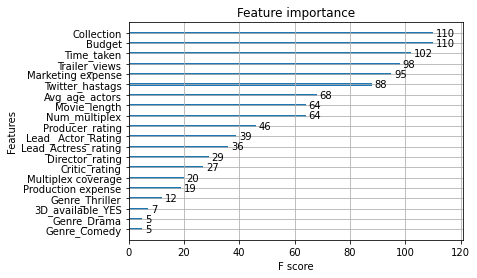

In [ ]:
xgb.plot_importance(xgb_clf)

In [ ]:
xgb_clf=xgb.XGBClassifier(n_estimators=500, learing_rate=0.1, random_state=42)

In [ ]:
param_test1={
     'max_depth':range(3,10,2),
     'gamma': [0.1,0.2,0.3],
     'subsample': [0.8,0.9],
     'colsample_bytree':[0.8,0.9],
     'reg_alpha':[1e-2,0.1,1]
}

In [ ]:
grid_search=GridSearchCV(xgb_clf,param_test1, n_jobs=-1, cv=5,scoring='accuracy')

In [ ]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(learing_rate=0.1, n_estimators=500,
                                     random_state=42),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [ ]:
cvxg_clf=grid_search.best_estimator_

In [ ]:
accuracy_score(y_test,cvxg_clf.predict(x_test))

0.6372549019607843

In [ ]:
grid_search.best_params_

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 9,
 'reg_alpha': 1,
 'subsample': 0.8}